<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C4_Tackling_Company_Bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this chapter, we will be using exploratory data analysis to identify early warning signs of fatigue in the financial data. The dataset is about the bankruptcy prediction of Polish companies. The data was collected from the Emerging Markets Information Service. The bankrupt companies were analyzed for the period of 2000-2012, while the still-operating companies were evaluated from 2007 to 2013.

Bankruptcy not only happens due to poor money management but also due
to external market factors such as economic slowdown or natural calamities.
Bankruptcy prediction comes in handy for predicting whether a company might enter financial distress in the near future. This can be achieved with the help of a predictive model that classifies the company as financially sound or financially unsound (where the probability of bankruptcy is high).

Explanation of Some of the most important terms in the dataset are as follows:
- Net profits: The amount that is left after all operating expenses,
interest, and taxes are subtracted from the total revenue.
- Total liabilities: The aggregate sum that is owed as debt and other financial obligations owed by an entity.
- Total assets: This is the total amount of assets owned by an entity.
- Current assets: This is cash and other assets that can be converted to cash within a year.
- Gross profit: This is the profit the company makes after deducting the
associated cost of manufacturing or services provided
- Inventory: This is the complete list of finished goods or goods used in
production by a company.
- Working capital: This is the capital of the company used for its
day-to-day operations.
- EBIT: This refers to earnings before interest and tax

# Importing Libraries and Data

In [ ]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

There is a total of five ARFF data files with the names 1year, 2year, 3year, 4year, and 5year, respectively.
We need to load the files and convert them into a pandas DataFrame. The columns are given a new header, as follows:
- dataframe[0] corresponds to 1year.
- dataframe[1] corresponds to 2year.
- dataframe[2] corresponds to 3year.
- dataframe[3] corresponds to 4year.
- dataframe[4] corresponds to 5year.

An Attribute-Relation File Format (ARFF) file is an ASCII text file. It essentially provides a list of instances that commonly share an attribute set.

In [ ]:
!wget https://archive.ics.uci.edu/static/public/365/polish+companies+bankruptcy+data.zip

--2023-12-15 04:20:10--  https://archive.ics.uci.edu/static/public/365/polish+companies+bankruptcy+data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘polish+companies+bankruptcy+data.zip’

polish+companies+ba     [   <=>              ]   8.42M  17.4MB/s    in 0.5s    

2023-12-15 04:20:11 (17.4 MB/s) - ‘polish+companies+bankruptcy+data.zip’ saved [8834471]



In [ ]:
!unzip {"/content/polish+companies+bankruptcy+data.zip"} -d {"/content"}

Archive:  /content/polish+companies+bankruptcy+data.zip
  inflating: /content/1year.arff     
  inflating: /content/2year.arff     
  inflating: /content/3year.arff     
  inflating: /content/4year.arff     
  inflating: /content/5year.arff     


In [ ]:
############################################################
# Loads the 5 raw .arff files into a list
def load_arff_raw_data():
    N=5
    return [arff.loadarff('/content/' + str(i+1) + 'year.arff') for i in range(N)]

############################################################
# Loads the 5 raw .arff files into pandas dataframes
def load_dataframes():
    # return a list of 5 pandas dataframes from 5 files
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.
dataframes = load_dataframes()

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)

# print the first 5 rows of a dataset 'year1'
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [ ]:
dataframes[0].shape

(7027, 65)

In [ ]:
dataframes[0].dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
        ...   
X61    float64
X62    float64
X63    float64
X64    float64
Y       object
Length: 65, dtype: object

In [ ]:
# The class labels for all the dataframes are originally in object type.
# Convert them to int types
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')     # get the values of Y column
        dfs[i]['Y'] = col.astype(int)

convert_class_label_type_int(dataframes)
dataframes[0].dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
        ...   
X61    float64
X62    float64
X63    float64
X64    float64
Y        int64
Length: 65, dtype: object

In [ ]:
dataframes[0].head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.20055,0.37951,0.39641,2.0472,32.3510,0.38825,0.24976,1.33050,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.7860,0.00000,0.25834,0.99601,1.6996,0.49788,...,0.12130,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0.00000,0.30906,0.43695,1.3090,0.30408,...,0.24114,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0


# Pandas Profiling

In this section, we will be focusing on pandas profiling—a simple and fast approach toward exploratory data analysis. It is essentially a package that promises a more efficient method of data analysis

Now, we need to initiate a loop to perform pandas profiling for the five DataFrames. The major advantage of using pandas profiling is that it provides you with an
interactive HTML report of the various statistical parameters of the columns in a DataFrame. Some of the parameters are missing values, skewness, kurtosis, mos frequent values, histograms, and correlations

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# if this cause error, restart the kernal and import again
import pandas_profiling

In [ ]:
for i in range(0,5):
    profile = dataframes[i].profile_report(title='Pandas Profiling Report',
                                           plot={'histogram': {'bins': 8}})
    profile.to_file(output_file=str(i)+"output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(dataframes[0], minimal=True) # the minimal mode won't compute correlation
profile.to_file(output_file="0output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Since the pandas-profiling is taking very long time to run on colab and crashing for not having enough RAM. Follow this [link](https://github.com/PacktWorkshops/The-Data-Analysis-Workshop/tree/master/Chapter04/HTML_Files) for all HTML files of the 5 dataframes.

From the reports, we can find the highly correlated and the high-percentage-of-missing-values features.

# Missing values Analysis

In [ ]:
# To analyze the missing data
!pip install missingno --quiet
import missingno as msno

<Axes: >

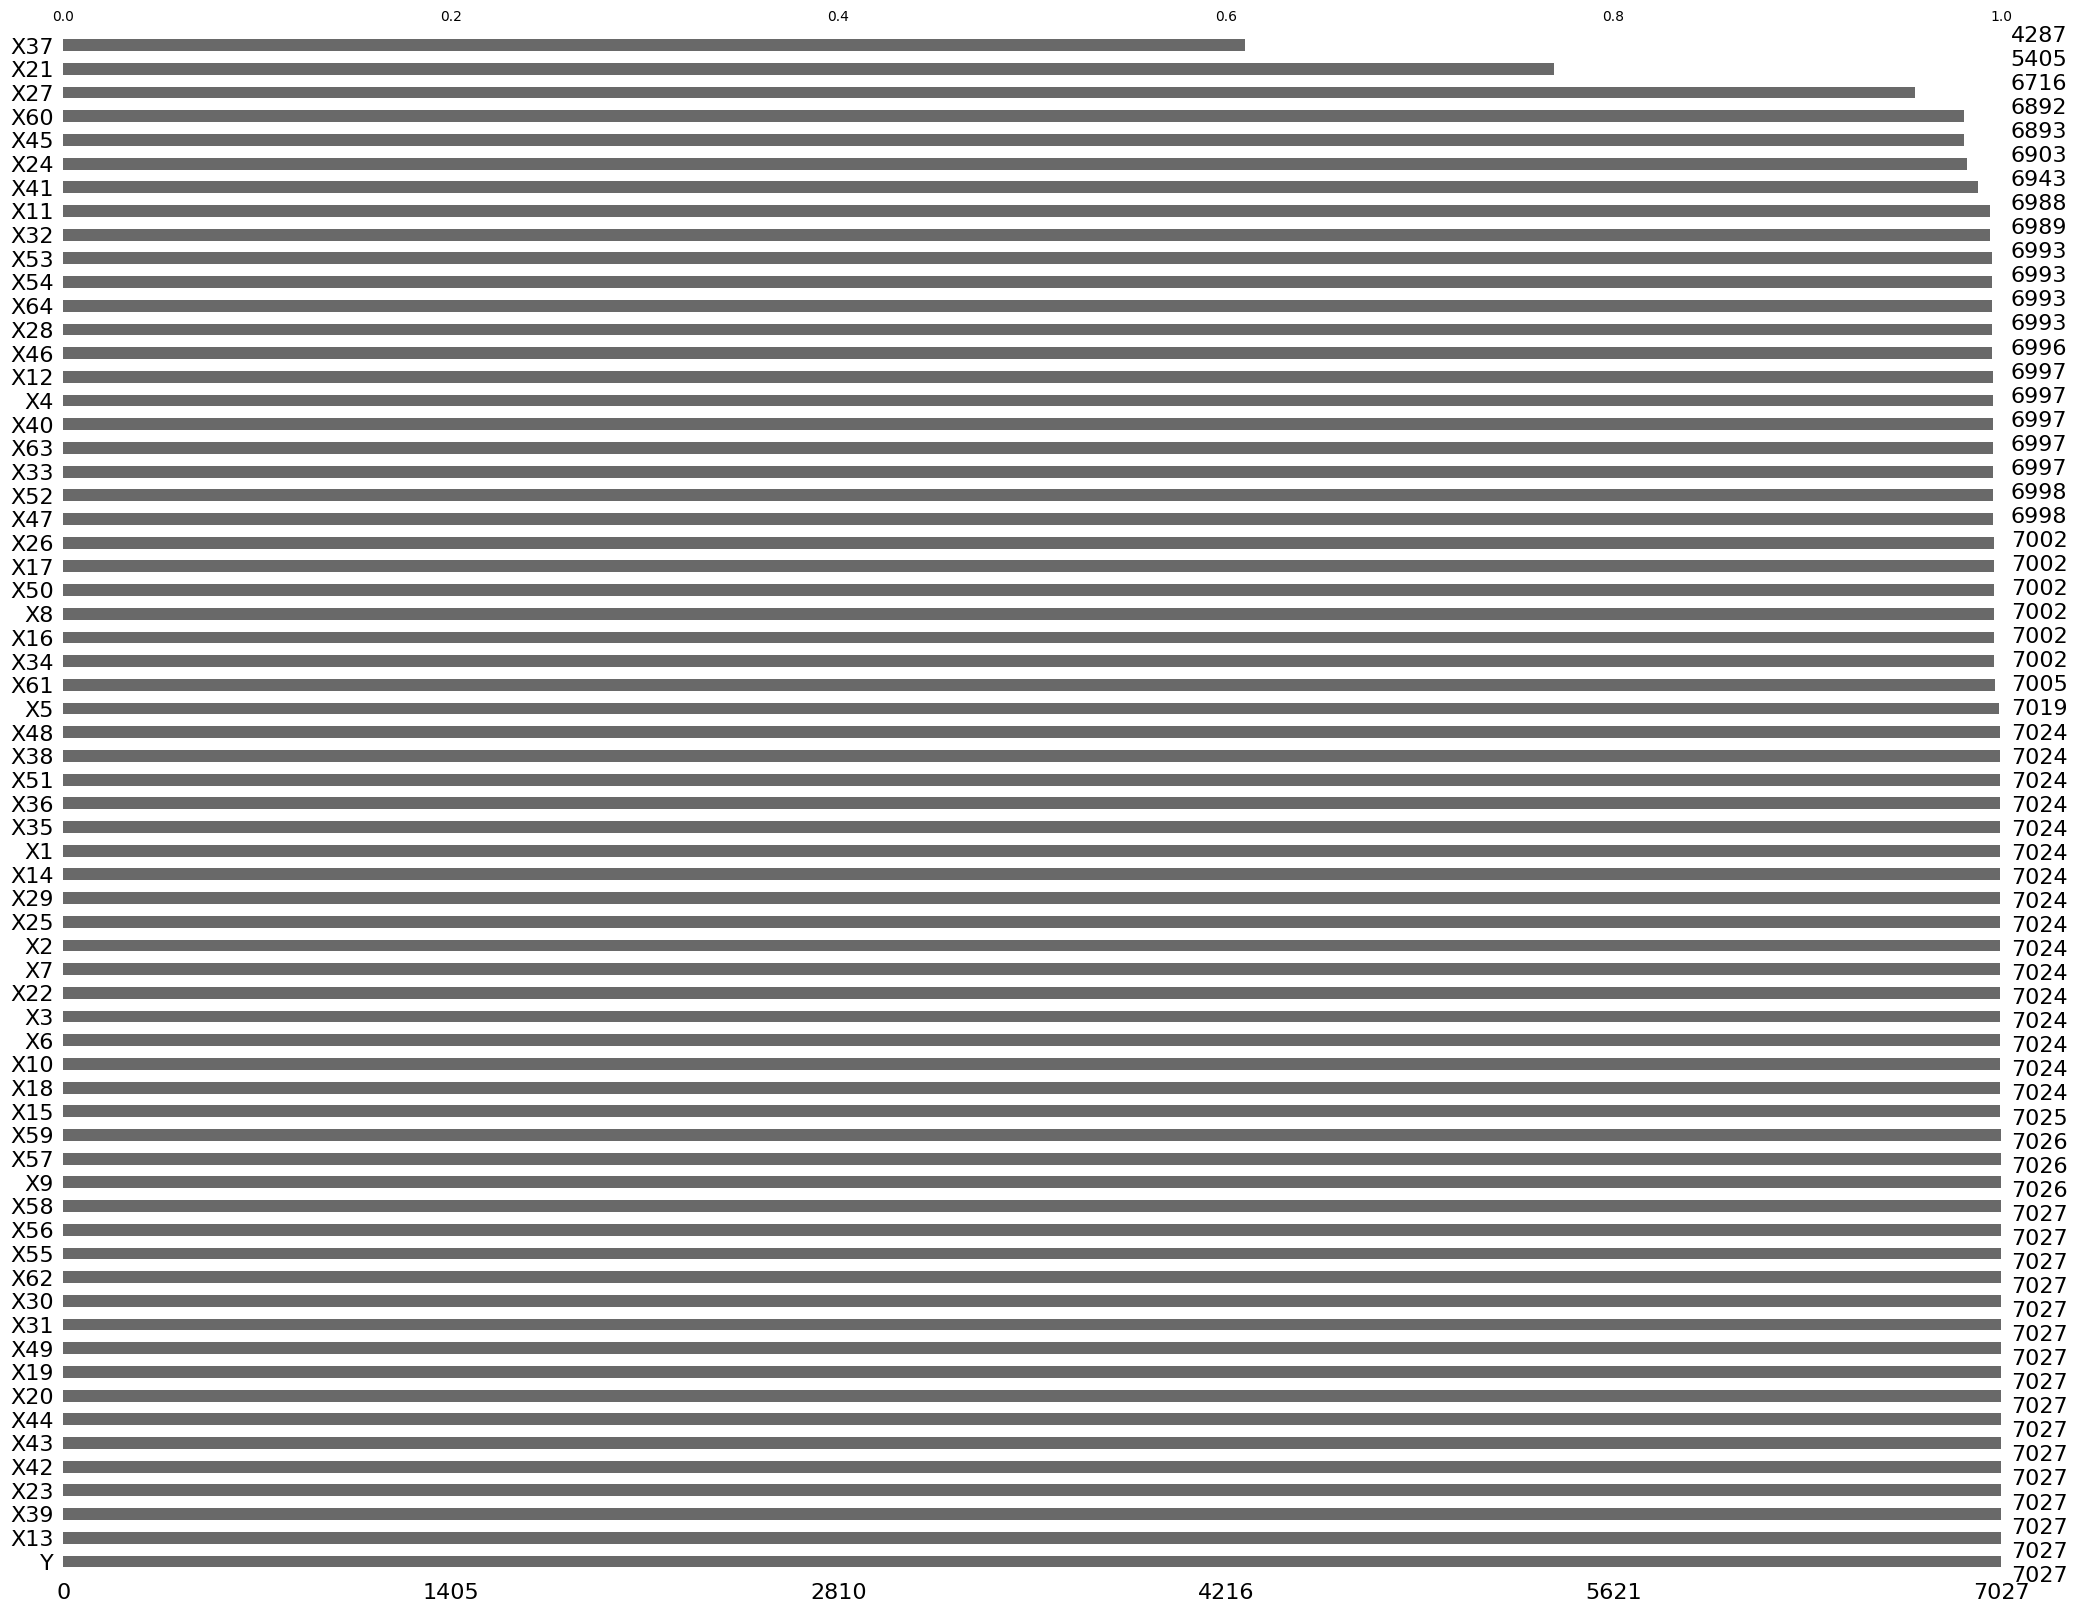

In [ ]:
# Missing Values in the first Dataframe
msno.bar(dataframes[0], sort="descending")

The x axis represents the features of a DataFrame, while the y axis represents the percentage of values present; for example, for feature X37, the value of the y axis is .6, which signifies that 60% of the data is present and the rest (40%) is missing.

Keep performing analysis on the other 4 dataframes, we see that they exhibits almost the same level of missing values in the columns.

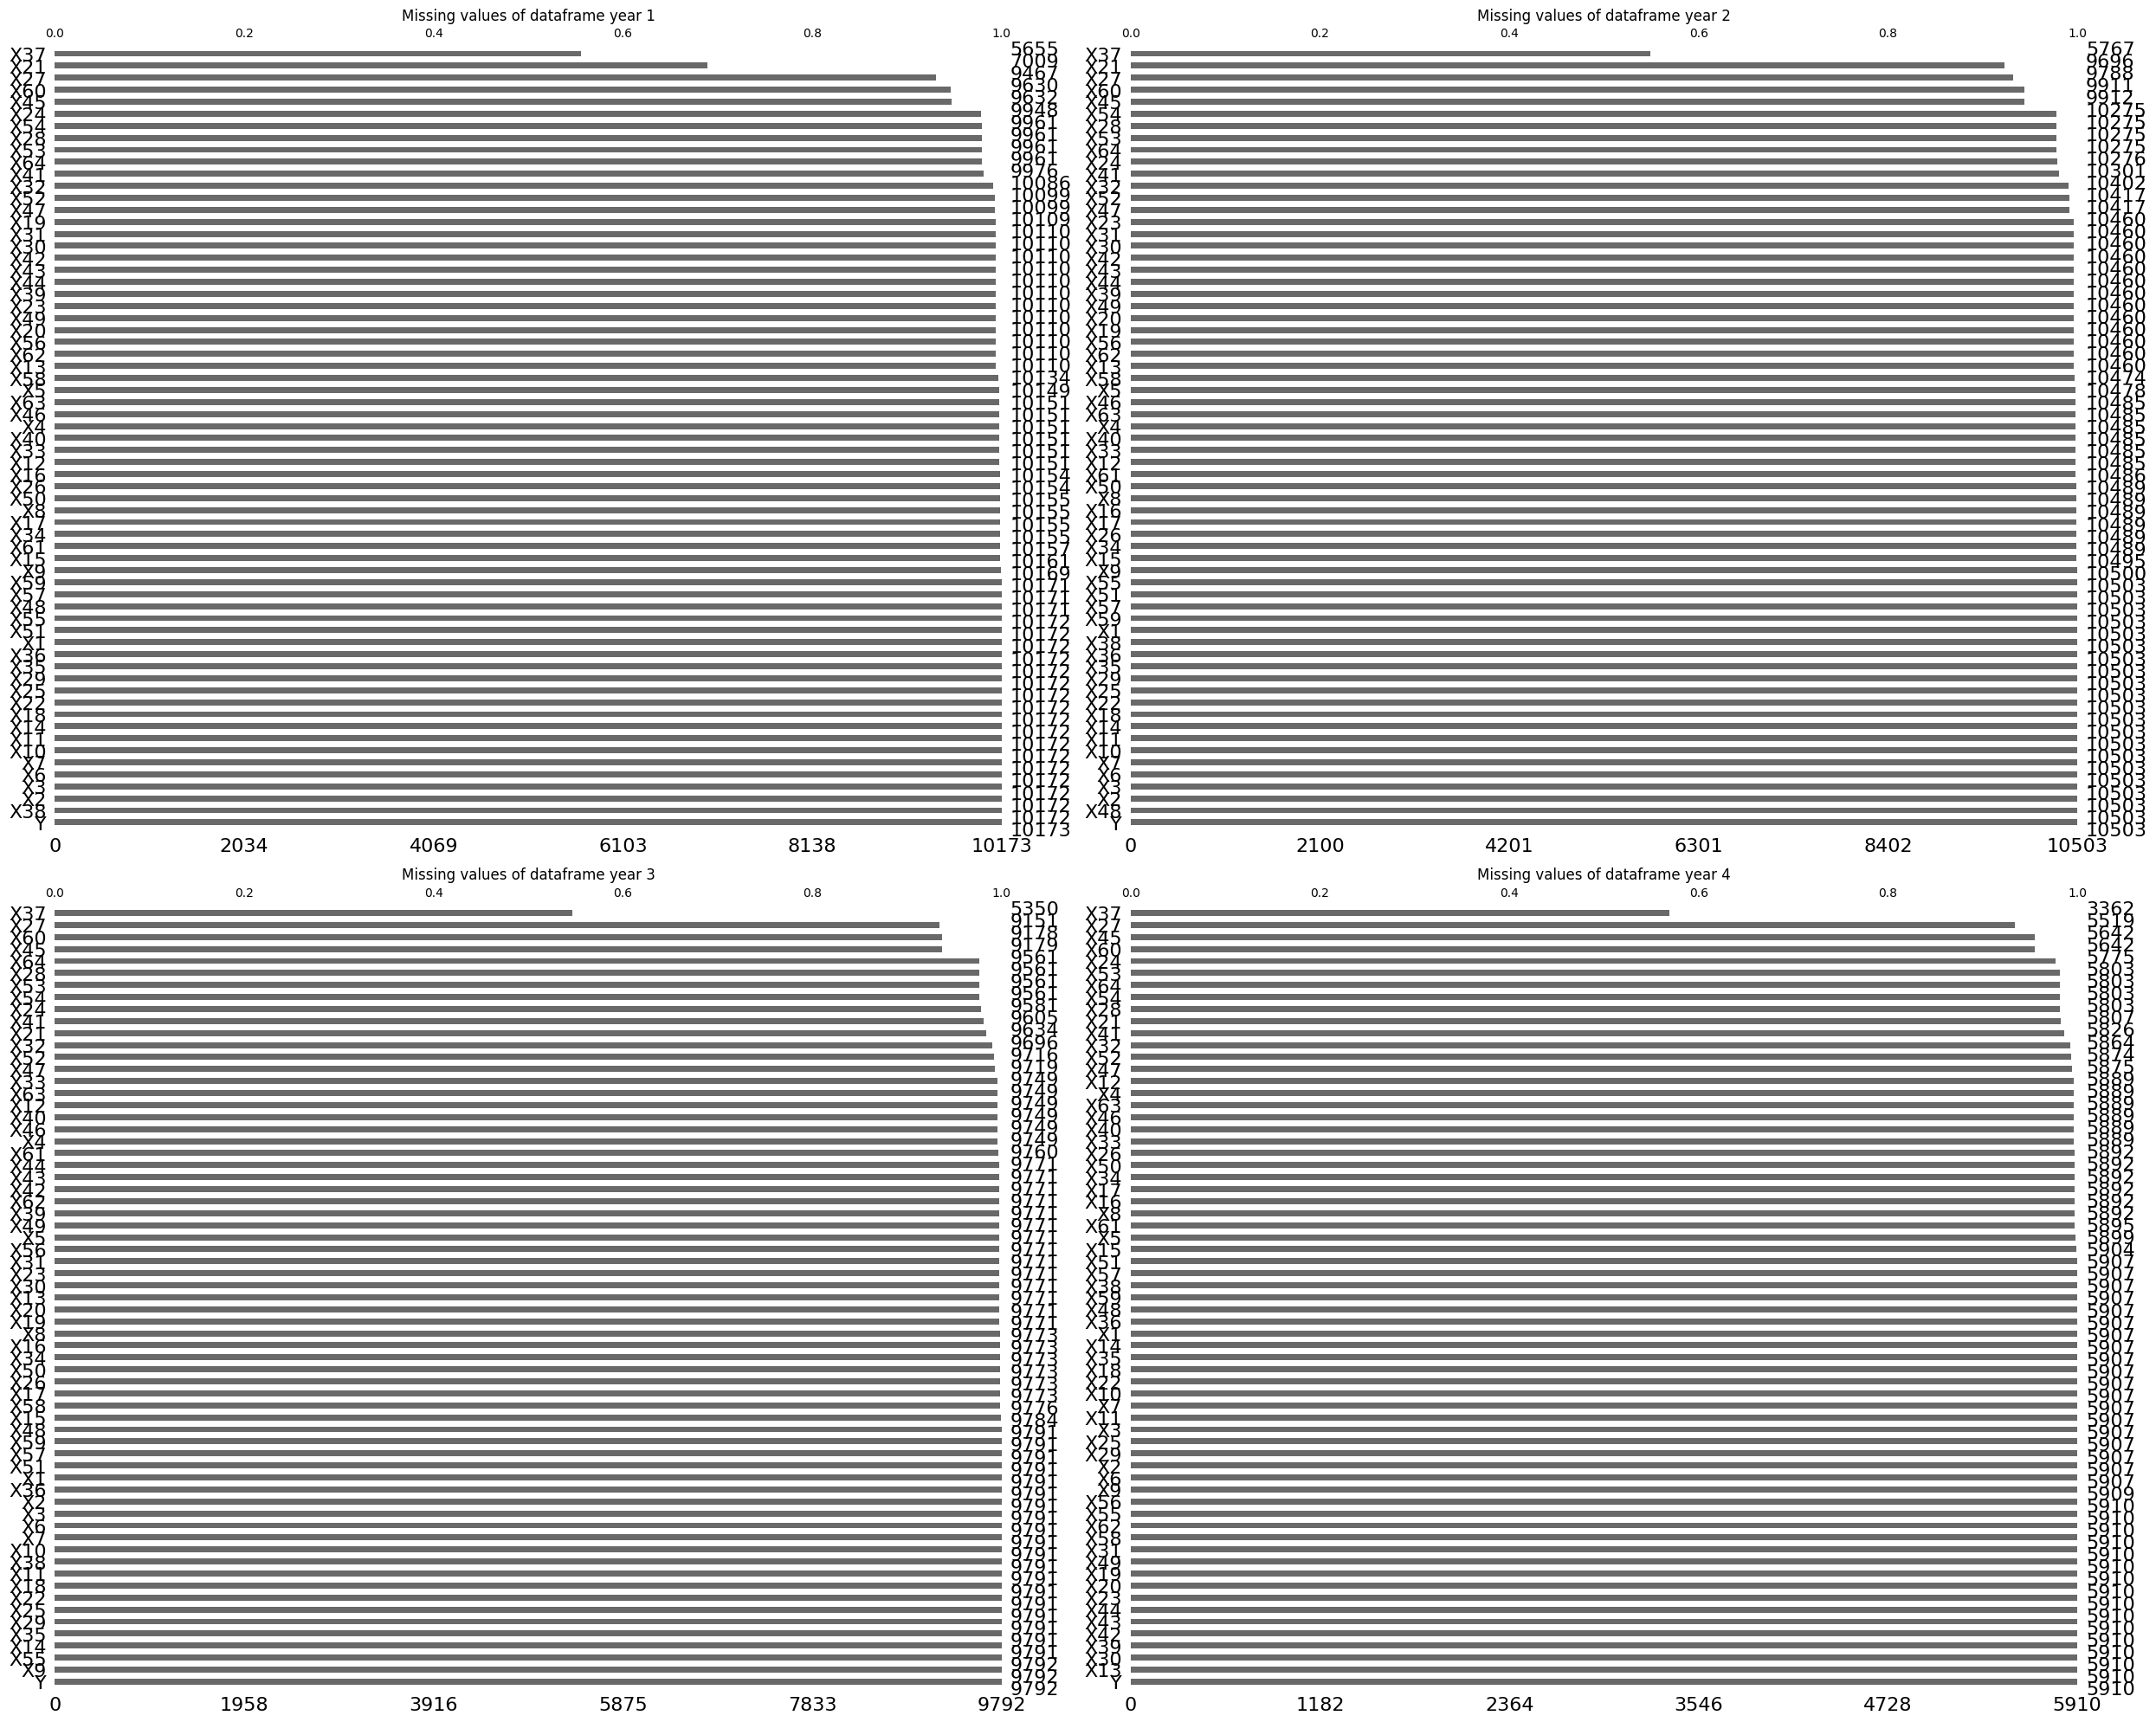

In [ ]:
import matplotlib.pyplot as plt
for i in range(1, 5):
    plt.subplot(2, 2, i)
    msno.bar(dataframes[i], sort="descending")
    plt.title(f"Missing values of dataframe year {i+1}")

plt.tight_layout()
plt.show()

## Imputation of Missing Values

### Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
mean_imputed_df1=pd.DataFrame(imputer.fit_transform(dataframes[0]),columns=dataframes[0].columns)

<Axes: >

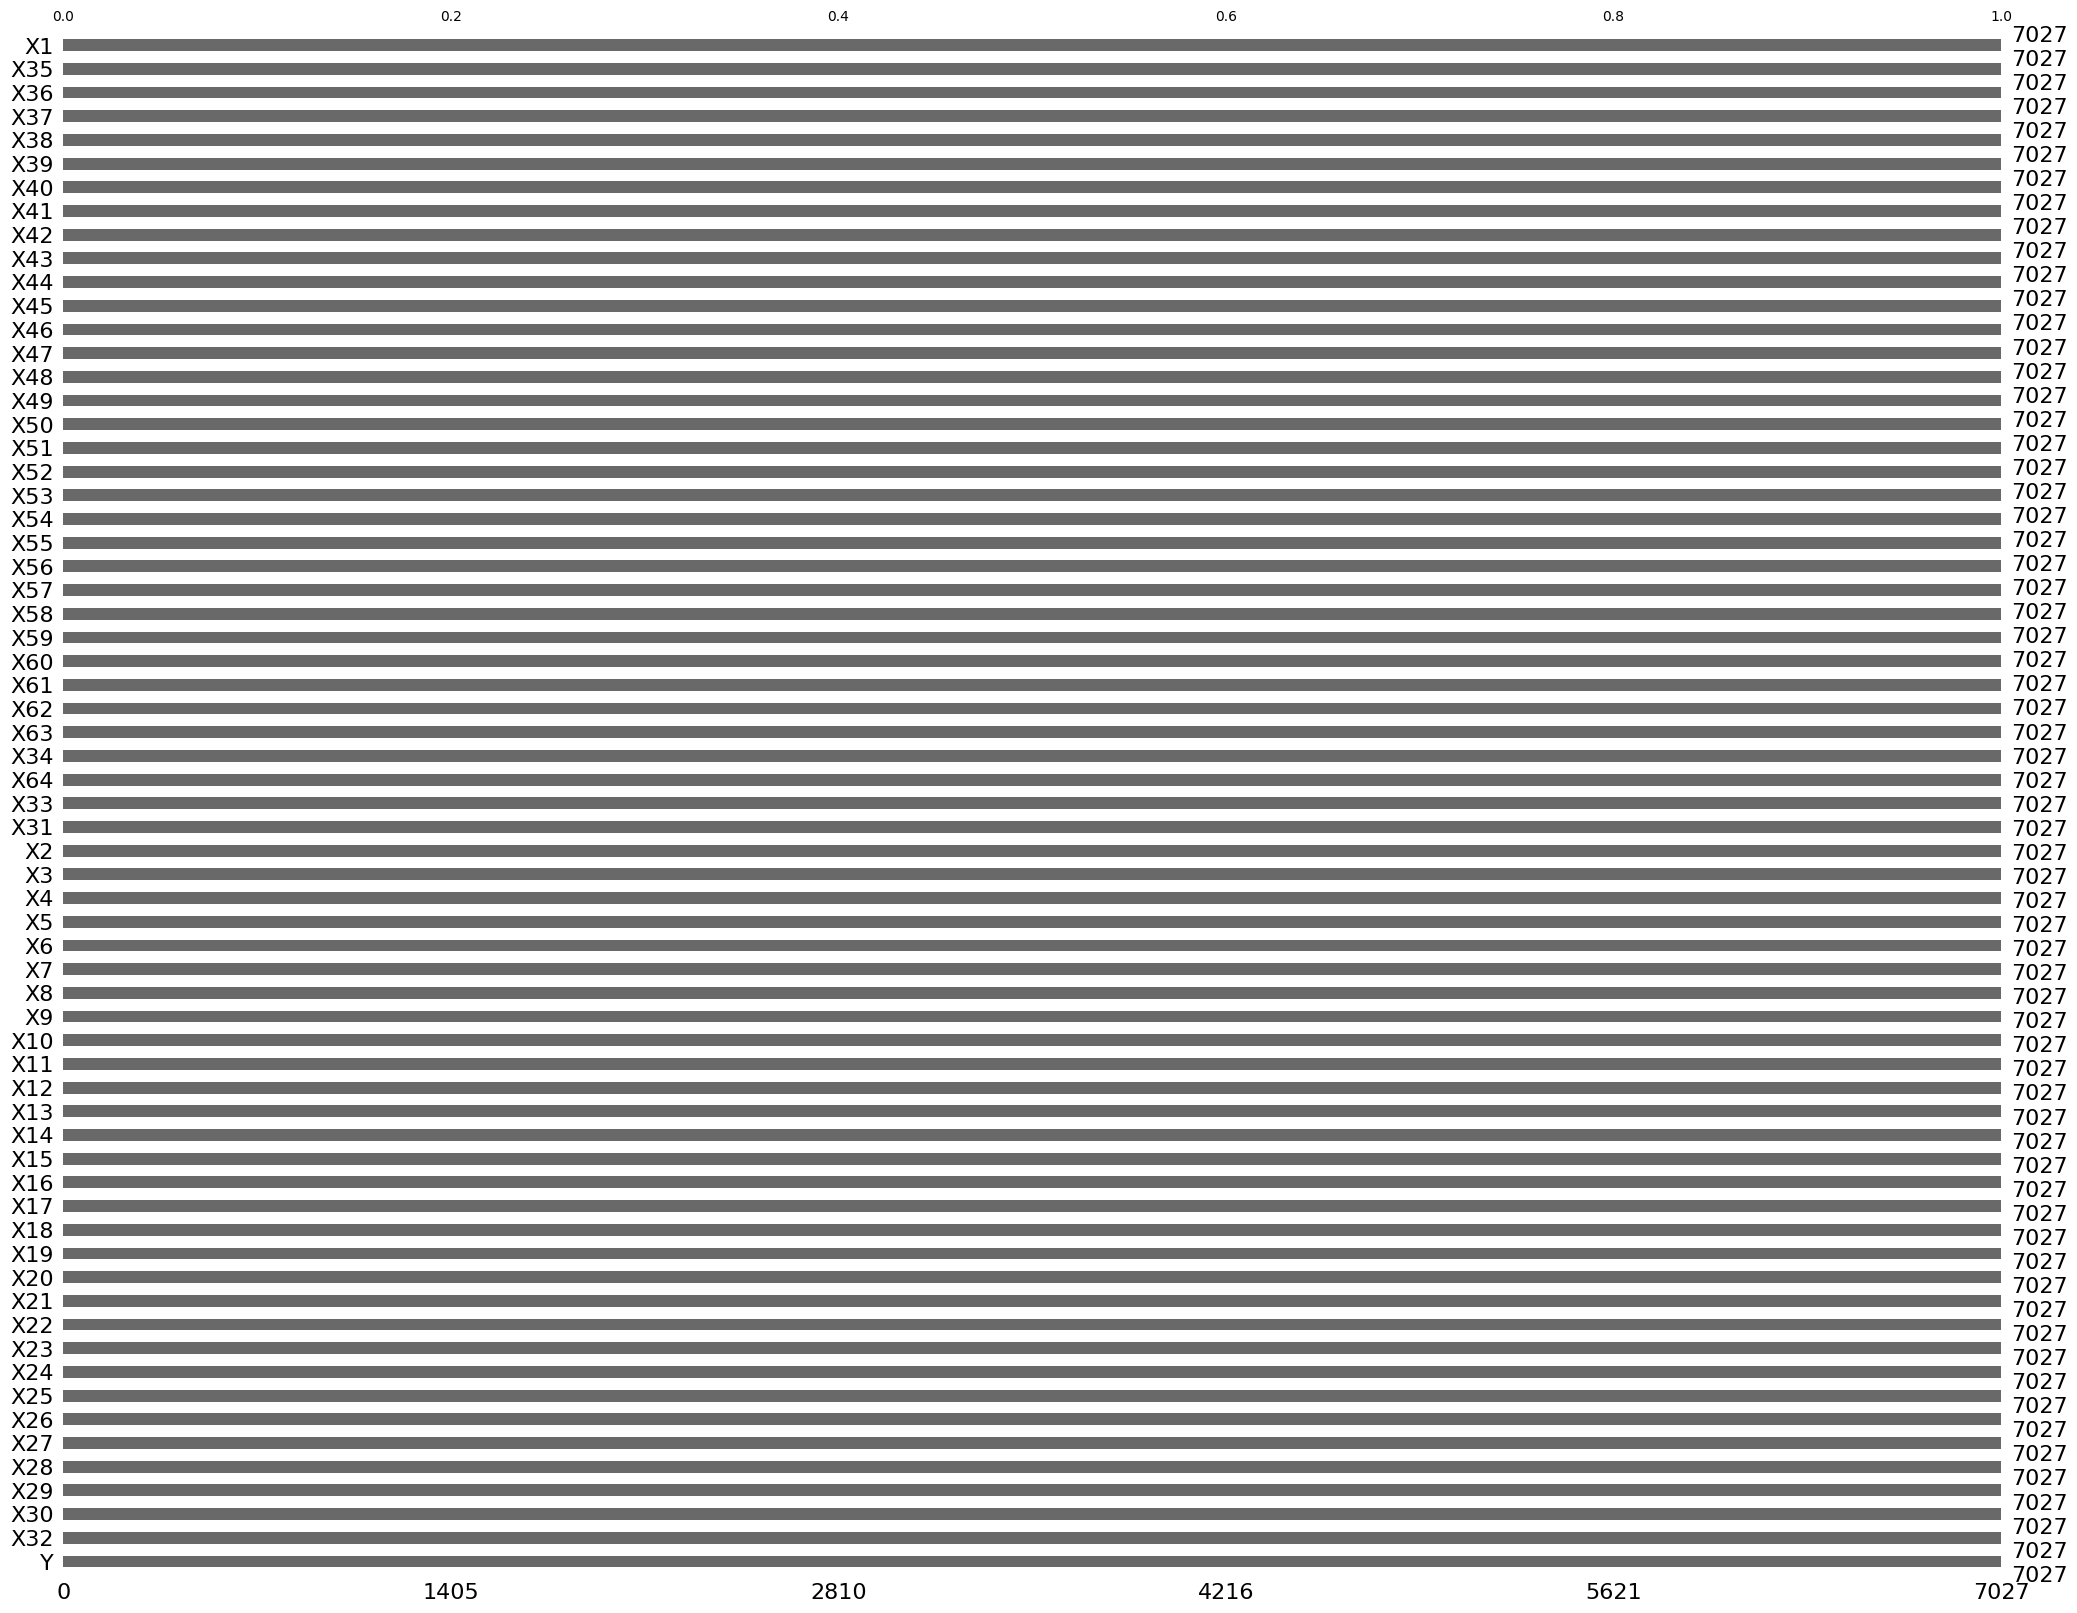

In [ ]:
msno.bar(mean_imputed_df1,sort="descending")

In [ ]:
# Imputation for the other DataFrames
mean_imputed_df2 = pd.DataFrame(imputer.fit_transform(dataframes[1]),columns=dataframes[1].columns)
mean_imputed_df3 = pd.DataFrame(imputer.fit_transform(dataframes[2]),columns=dataframes[2].columns)
mean_imputed_df4 = pd.DataFrame(imputer.fit_transform(dataframes[3]),columns=dataframes[3].columns)
mean_imputed_df5 = pd.DataFrame(imputer.fit_transform(dataframes[4]),columns=dataframes[4].columns)

Imputing the missing values in a DataFrame is a prerequisite to performing lasso regularization, with which we can identify the important features that are responsible for bankruptcy.

### Iterative Imputation

An iterative imputer models every feature with a missing value as a function of the other features and uses that estimate to impute the missing values. This is done in a round-robin function where the feature with missing values is defined as a target variable and the other features are considered as being independent. A regressor is then fit on (X, y) for a known value of y and is used to predict the missing values of y.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer()

<Axes: >

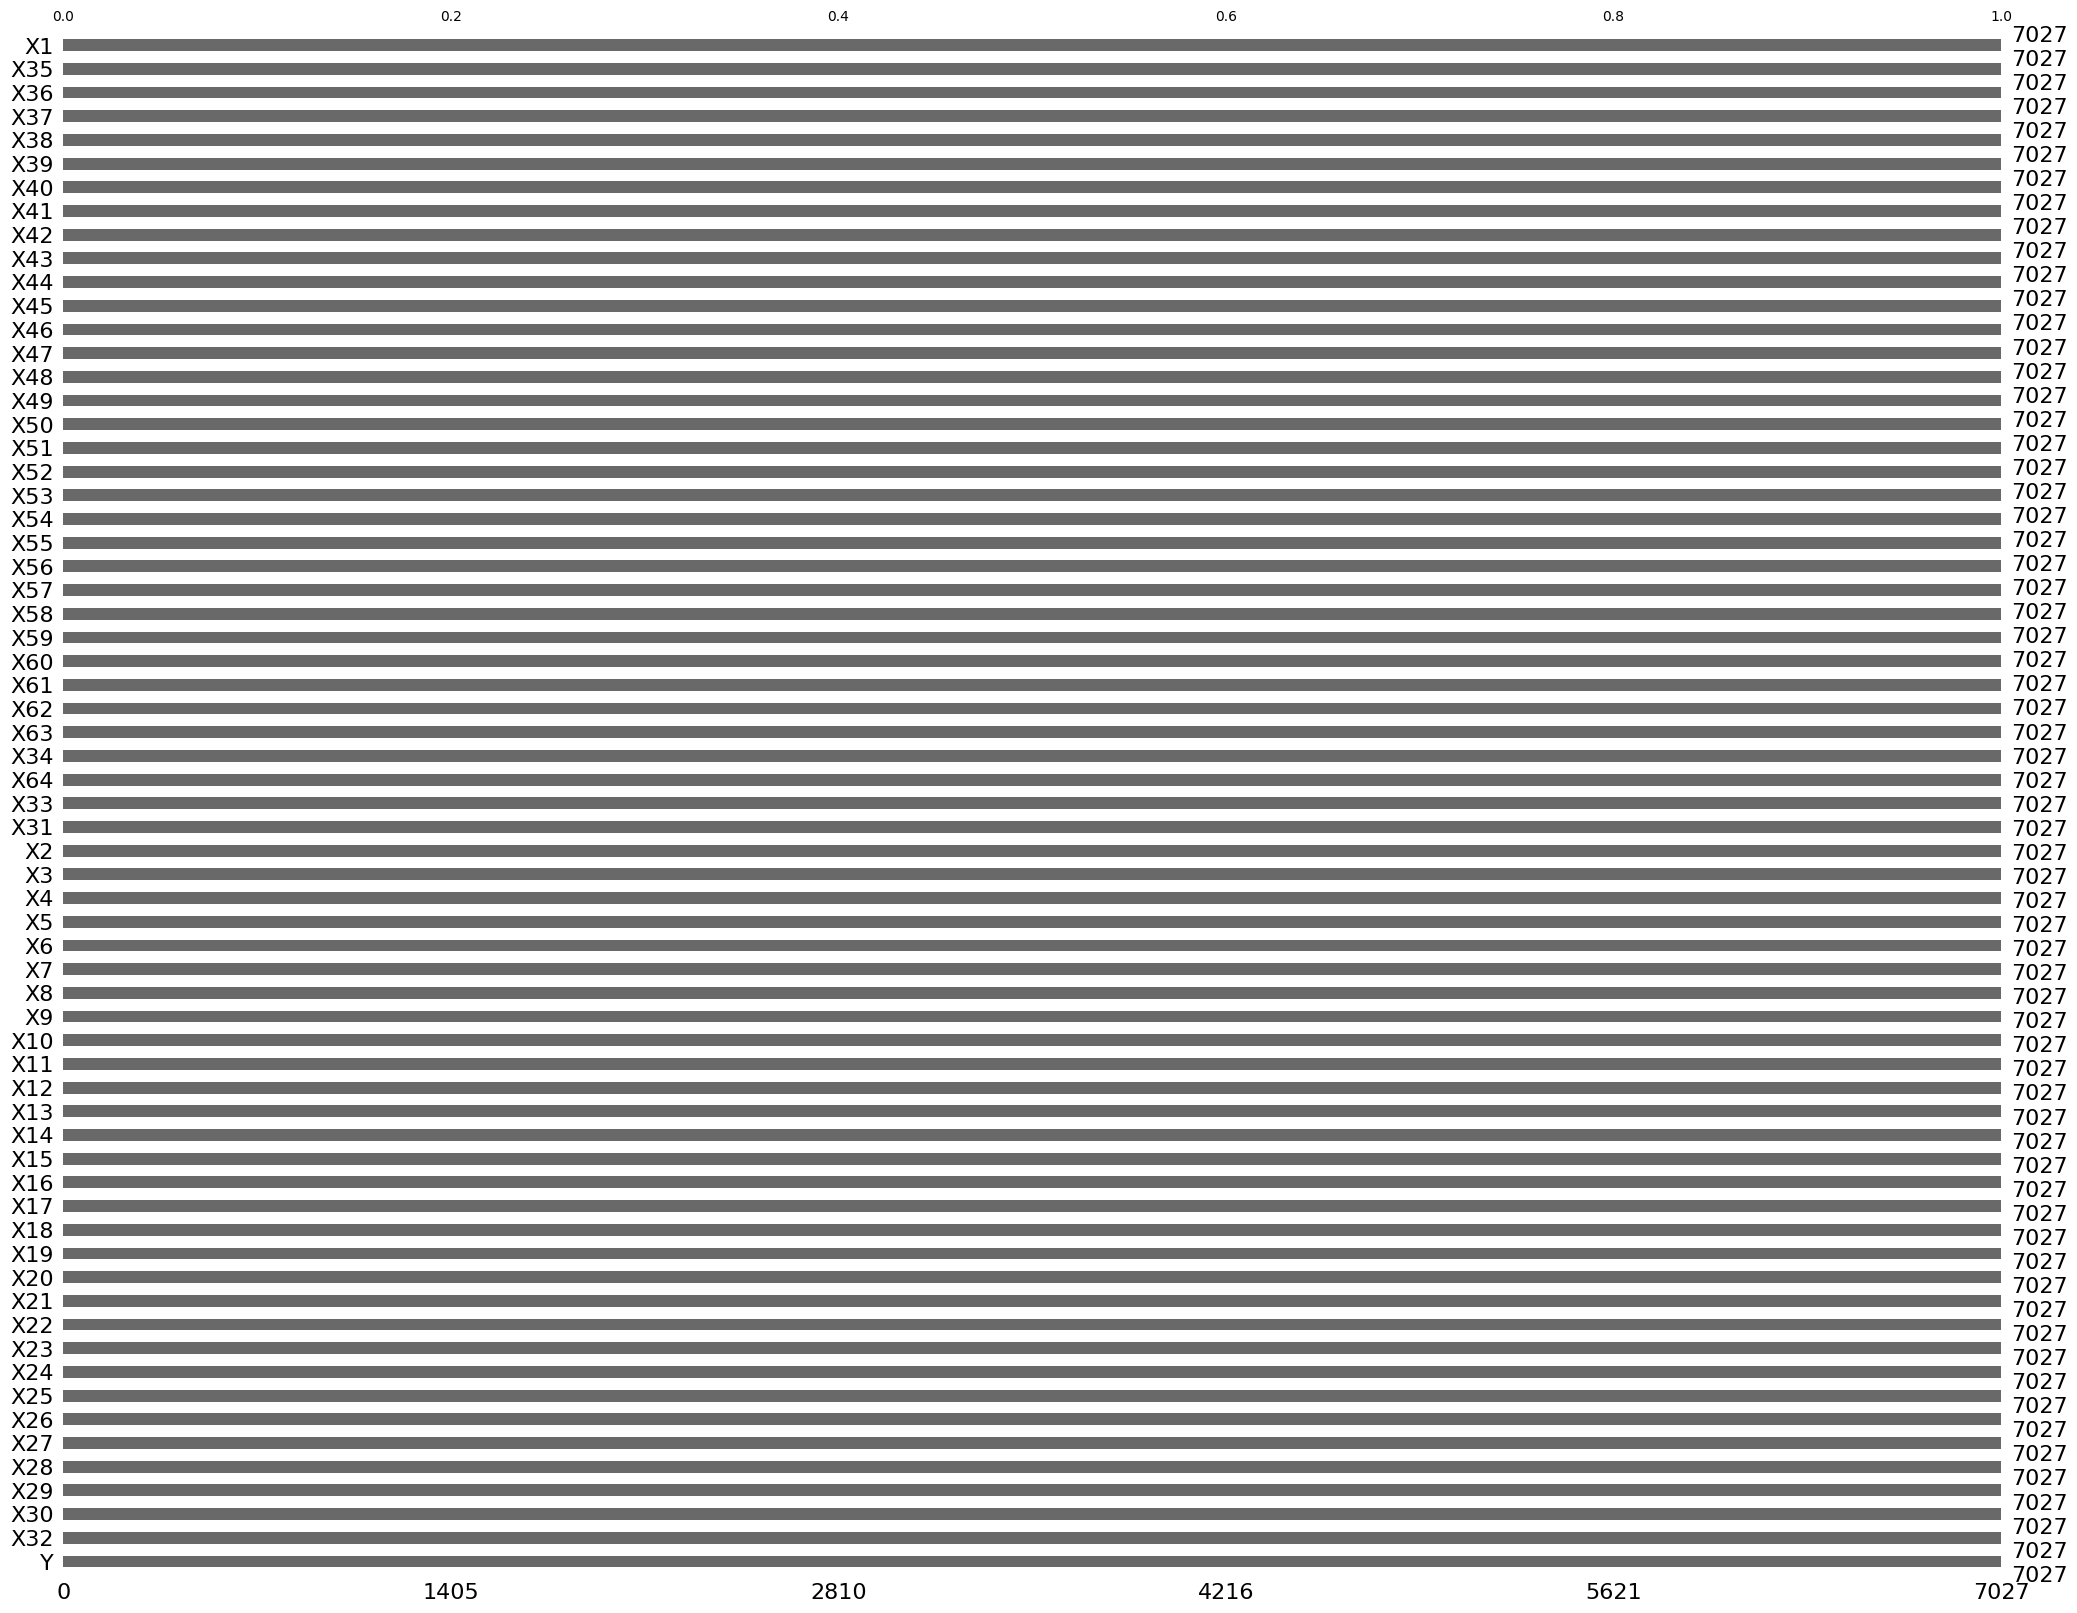

In [ ]:
iterative_imputed_df1 = pd.DataFrame(imputer.fit_transform(dataframes[0]),columns=dataframes[0].columns)
msno.bar(iterative_imputed_df1, sort="descending")

In [ ]:
# Imputation for the other DataFrames
iterative_imputed_df2 = pd.DataFrame(imputer.fit_transform(dataframes[1]),columns=dataframes[1].columns)
iterative_imputed_df3 = pd.DataFrame(imputer.fit_transform(dataframes[2]),columns=dataframes[2].columns)
iterative_imputed_df4 = pd.DataFrame(imputer.fit_transform(dataframes[3]),columns=dataframes[3].columns)
iterative_imputed_df5 = pd.DataFrame(imputer.fit_transform(dataframes[4]),columns=dataframes[4].columns)

# Splitting the Features

In this section, we will be splitting the dependent variables in the DataFrame into y and the independent variables into X. The dependent variables are an outcome of a process. In our case, this process is whether a company is bankrupt or not.

Splitting the features acts as a precursor to our next step, where we select the most important X variables that determine the dependent variable

In [ ]:
# Mean imputed dataframes
#First DataFrame
X0=mean_imputed_df1.drop('Y',axis=1)
y0=mean_imputed_df1.Y

#Second DataFrame
X1=mean_imputed_df2.drop('Y',axis=1)
y1=mean_imputed_df2.Y

#Third DataFrame
X2=mean_imputed_df3.drop('Y',axis=1)
y2=mean_imputed_df3.Y

X6=mean_imputed_df4.drop('Y',axis=1)
y6=mean_imputed_df4.Y
X7=mean_imputed_df5.drop('Y',axis=1)
y7=mean_imputed_df5.Y

In [ ]:
# Iterative imputed dataframes
#First DataFrame
X3=iterative_imputed_df1.drop('Y',axis=1)
y3=iterative_imputed_df1.Y

#Second DataFrame
X4=iterative_imputed_df2.drop('Y',axis=1)
y4=iterative_imputed_df2.Y

#Third DataFrame
X5=iterative_imputed_df3.drop('Y',axis=1)
y5=iterative_imputed_df3.Y

X8=iterative_imputed_df4.drop('Y',axis=1)
y8=iterative_imputed_df4.Y
X9=iterative_imputed_df5.drop('Y',axis=1)
y9=iterative_imputed_df5.Y

# Feature Selection with Lasso

Lasso regularization is a method of feature selection where the coefficients of irrelevant features are set to zero. By doing so, we remove the features that are insignificant and only the remaining significant features are included for further analysis.

In [ ]:
# import library
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
features_names=X0.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X0,y0)

Lasso(alpha=0.01, positive=True)

In [ ]:
coef_list=sorted(zip(map(lambda x: round(x,4), lasso.coef_.reshape(-1)),
                     features_names),reverse=True)
coef_list [0:5]

[(0.0016, 'X2'), (0.0003, 'X34'), (0.0001, 'X51'), (0.0, 'X9'), (0.0, 'X8')]

By performing lasso regularization, we end up with only 3 significant features out of 64. The columns that are significant are as follows:
- X2: Total liabilities/total assets
- X34: Operating expenses/total liabilities
- X51: Short-term liabilities/total assets

Note: Columns X9 and X8 have zero significance.

We will do similarly to other dataframes.

In [ ]:
features_names=X7.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X7,y7)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:10]

[(0.0216, 'X51'),
 (0.0015, 'X2'),
 (0.001, 'X9'),
 (0.001, 'X36'),
 (0.0003, 'X59'),
 (0.0003, 'X52'),
 (0.0001, 'X61'),
 (0.0001, 'X31'),
 (0.0001, 'X30'),
 (0.0001, 'X20')]

In [ ]:
...

In this chapter, we learned how to import an ARFF file into a pandas DataFrame. Pandas profiling was performed on the DataFrame to get the correlated features. We detected the missing values using the missingno package and performed imputation using the mean and iterative imputation methods.

In order to find the important features that contribute to bankruptcy, we performed lasso regularization. With lasso regularization, we found which features are responsible for bankruptcy. Even though we get the different important features across all five DataFrames, one of the features occurs across all five DataFrames, which is nothing but the ratio of total liabilities to total assets. This particular ratio has a very high significance in leading to bankruptcy.

However, our analysis is not fully complete since we only found the factors that affect bankruptcy, but not the direction (whether bankruptcy may occur when a particular ratio increases or decreases).

To get a complete view of these factors, we need to build a classification model to expand our analysis. This more advanced process, however, is beyond the scope of this book.